# Introducción al Concepto de Regularización


En el contexto de la regresión, la regularización se refiere a técnicas para restringir/reducir las estimaciones de coeficientes hacia cero. 

La reducción de los coeficientes puede 1) mejorar el ajuste del modelo y 2) reducir la varianza de los coeficientes. 

Dos tipos comunes de regularización son ridge y lasso. Recuerde que la regresión lineal de mínimos cuadrados minimiza la suma residual de cuadrados (RSS). En otras palabras, minimiza

$ RSS = \displaystyle \sum^{n}_{i=1} (y_i - \beta_0 - \sum^{p}_{j=1} \beta_j x_{ij})^2 $

En ridge y lasso, agregamos un termino al valor que estamos intentando minimizar.

En ridge, minimizamos

$ RSS + \lambda \displaystyle \sum^{p}_{j=1} \beta_j^2 $

En lasso, minimizamos

$ RSS + \lambda \displaystyle \sum^{p}_{j=1} |\beta_j| $

El $\lambda$ (pronounciado "lambda") es un hiper-prámetro que determina que tan "fuerte" es el efecto de la regularización.

Nota: en oportunidades $\alpha$ (pronounciado "alpha") se usa como notación en vez de $\lambda$.

Una forma útil de usar la regresión de ridge o lasso es ejecutar la regresión en un rango de alfas y ver qué variables mantienen un coeficiente beta grande durante más tiempo. ¡Son estas variables las que tienen el mejor poder predictivo! 

Puede encontrar más información detallada aquí: [Regularization Regression](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)

In [1]:
# Cargar paquetes de Python
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
sns.set()
sns.set(font_scale=1.5)

# Paquetes para validar los supuestos
from scipy import stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Paquetes para la regularización
from sklearn.linear_model import Lasso
from math import pow, sqrt

np.random.seed(1234)

2) Carga de Data
---

In [26]:
path = '../data/'
filename = 'loans.csv'

df = pd.read_csv(path+filename)

In [3]:
df.dtypes

id_number                 int64
loan_amount               int64
lender_count              int64
status                   object
funded_date              object
funded_amount             int64
repayment_term            int64
location_country_code    object
sector                   object
description              object
use                      object
dtype: object

In [4]:
# Creamos variables indicadoras por pais (dummies)
for country in df['location_country_code'].unique():
    if country is not np.nan:
        df['country_'+country] = np.where(df.location_country_code == country, 1, 0)

In [5]:
# Creamos variables indicadoras por sector (dummies)
for sect in df['sector'].unique():
    df['sector_'+sect] = np.where(df.sector == sect, 1, 0)

In [6]:
df.dtypes

id_number                 int64
loan_amount               int64
lender_count              int64
status                   object
funded_date              object
funded_amount             int64
repayment_term            int64
location_country_code    object
sector                   object
description              object
use                      object
country_BJ                int64
country_BW                int64
country_BF                int64
country_BI                int64
country_CM                int64
country_CG                int64
country_CD                int64
country_EG                int64
country_GH                int64
country_CI                int64
country_KE                int64
country_LS                int64
country_LR                int64
country_MG                int64
country_MW                int64
country_ML                int64
country_MR                int64
country_MZ                int64
country_NG                int64
country_RW                int64
country_

In [7]:
pd.options.mode.chained_assignment = None  # default='warn'

# Definimos la variable dependiente
y = df['loan_amount']
# Definimos las variables independientes
X = df[['lender_count', 'sector_Education', 'sector_Clothing', 
        'sector_Personal Use', 'sector_Retail', 'sector_Transportation', 'sector_Agriculture']]
# Agregamos el intercepto a la variable independiente
X['cnst'] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     3031.
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        02:47:07   Log-Likelihood:                -40379.
No. Observations:                4815   AIC:                         8.077e+04
Df Residuals:                    4807   BIC:                         8.083e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
lender_count             31.11

In [8]:
alphas = np.arange(0.001, 0.502, 0.002)
lasso_coefs = []
X_train_lasso= X_train[X_train.columns.tolist()] # Select columns / features for model

for a in alphas:
    lassoreg = Lasso(alpha=a, copy_X=True, normalize=True)
    lassoreg.fit(X_train_lasso, y_train)
    lasso_coefs.append(lassoreg.coef_)

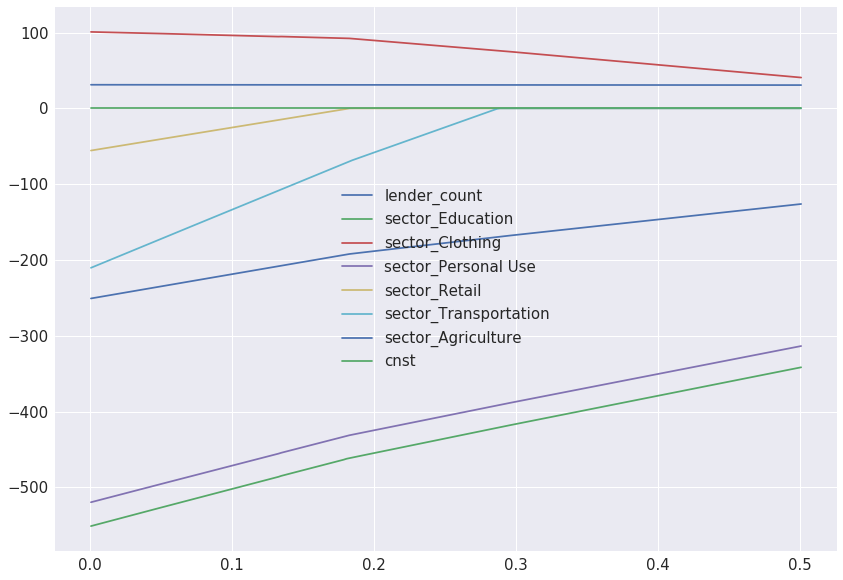

In [9]:
lasso_coefs = np.asarray(lasso_coefs).T

plt.figure(figsize=(14,10))
for coefs, feature in zip(lasso_coefs, X_train_lasso.columns):
    plt.plot(alphas, coefs, label = feature)
plt.legend(loc='best')
plt.show()

Retail and Transportation go to 0 when alpha is 0.3.  Let's try removing these from the model.

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define the dependent variable
y = df['loan_amount']
# Define the independent variables
X = df[['lender_count', 'sector_Education', 'sector_Clothing', 
        'sector_Personal Use', 'sector_Agriculture']]
# Add an intercept term to the independent variables
X['cnst'] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     4241.
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        02:47:16   Log-Likelihood:                -40381.
No. Observations:                4815   AIC:                         8.077e+04
Df Residuals:                    4809   BIC:                         8.081e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
lender_count           31.1189    

Aunque eliminamos dos variables dependientes del análisis, nuestro R cuadrado y el R cuadrado ajustado se mantuvieron igual. Esto significa que las dos variables que eliminamos (Transportation y Retail) son menos importantes para el monto del préstamo. El ejemplo anterior muestra cómo podemos usar la regularización para la selección de variables.

# Aspectos importante de la regularización

Recuerde que con regresión lineal de mínimos cuadrados, los coeficientes son equivalentes de escala. En otras palabras, multiplicar una variable por una constante $ c $ es equivalente a escalar de la estimación del coeficiente de mínimos cuadrados por un factor de 1 / $ c $. 

Demostremos este hecho creando un conjunto de datos de ejemplo que tenga tres variables: 1) cantidad de dinero que se gana en un restaurante en un día, 2) distancia en metros a la universidad más cercana, 3) distancia en kilómetros al hospital más cercano.

In [11]:
np.random.seed(1234)

earnings = np.random.normal(2000, 300, 50)
university_distances = np.random.normal(7000,2000,50)
hospital_distances = np.random.normal(7,2,50)

earnings = [a if a > 0 else -a for a in earnings]
university_distances = [a if a > 0 else -a for a in university_distances]
hospital_distances = [a if a > 0 else -a for a in hospital_distances]

In [12]:
df = pd.DataFrame({"earnings": sorted(earnings), "university": sorted(university_distances, reverse=True), 
                   'hospital' : sorted(hospital_distances, reverse=True)})

In [13]:
df

,earnings,hospital,university
0,1327.194514,11.731537,11061.207242
1,1377.506720,10.860494,11015.685902
2,1393.623554,10.787069,10091.317609
3,1454.891832,9.726963,9783.972387
4,1535.928334,9.449149,9642.211231
5,1642.707292,9.420767,9067.601465
6,1730.852965,9.353625,8969.839684
7,1783.823380,8.968376,8682.017590
8,1803.209197,8.750951,8633.187853
9,1809.042949,8.632254,8534.737472


Text(0.5,1,'Scatter plot of distance to nearest university (in meters) vs earnings')

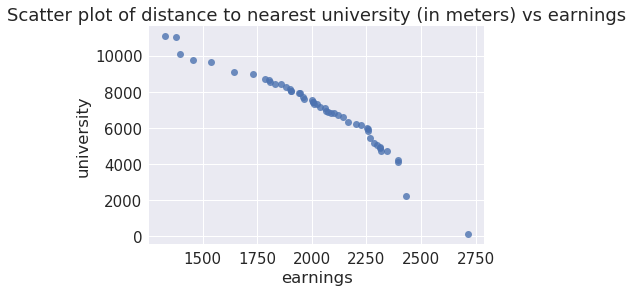

In [14]:
# Grafico: distancia a la universidad mas cercana (en metros) vs. ganancia

ax = sns.regplot(x='earnings', y='university', data=df, fit_reg=False)
ax.set_title('Scatter plot of distance to nearest university (in meters) vs earnings')

Text(0.5,1,'Scatter plot of distance to nearest hospital (in kilometers) vs earnings')

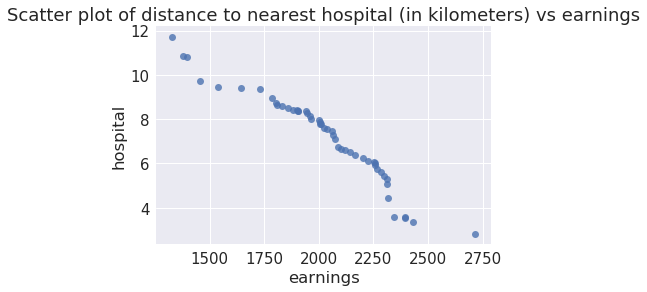

In [15]:
# Grafico: distancia al hospital mas cercano (en metros) vs. ganancia

ax = sns.regplot(x='earnings', y='hospital', data=df, fit_reg=False)
ax.set_title('Scatter plot of distance to nearest hospital (in kilometers) vs earnings')

Realicemos una regresión lineal multivariante sin escalar ninguna variable y comparemos los resultados con un modelo en el que estandaricemos las variables de distancia para que ambos usen kilómetros.

In [16]:
model1 = smf.ols(formula = 'earnings ~ university + hospital', data = df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     353.0
Date:                Sat, 03 Aug 2019   Prob (F-statistic):           4.90e-29
Time:                        02:47:18   Log-Likelihood:                -284.91
No. Observations:                  50   AIC:                             575.8
Df Residuals:                      47   BIC:                             581.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3024.1009     40.095     75.423      0.0

El R cuadrado es 0.938 y el R cuadrado ajustado es 0.935. Los coeficientes para el intercepto, la universidad y el hospital son 3024.1009, -0.0643 y -76.3083. Ahora escalemos la variable universitaria para que esté en kilómetros en lugar de metros.

In [17]:
df_scaled = df.copy()
df_scaled['university'] = df_scaled['university']/1000

df_scaled

,earnings,hospital,university
0,1327.194514,11.731537,11.061207
1,1377.506720,10.860494,11.015686
2,1393.623554,10.787069,10.091318
3,1454.891832,9.726963,9.783972
4,1535.928334,9.449149,9.642211
5,1642.707292,9.420767,9.067601
6,1730.852965,9.353625,8.969840
7,1783.823380,8.968376,8.682018
8,1803.209197,8.750951,8.633188
9,1809.042949,8.632254,8.534737


In [18]:
model2 = smf.ols(formula = 'earnings ~ university + hospital', data = df_scaled).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     353.0
Date:                Sat, 03 Aug 2019   Prob (F-statistic):           4.90e-29
Time:                        02:47:18   Log-Likelihood:                -284.91
No. Observations:                  50   AIC:                             575.8
Df Residuals:                      47   BIC:                             581.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3024.1009     40.095     75.423      0.0

El R cuadrado es 0.938 y el R cuadrado ajustado es 0.935. Los coeficientes para el intercepto, la universidad y el hospital son 3024.1009, -64.3473 y -76.3083. Ahora, cambiamos la variable universitaria al escalarla por una constante y el coeficiente resultante fue escalado por la misma constante. Los p-values no cambiaron y los coeficientes de las otras variables no cambiaron. 

¿Qué crees que hará el escalado si incorporamos la regularización mediante el uso de regresión lasso ridge? ¿Crees que la escala tendrá un efecto en los coeficientes de las variables?

<br>
<br>
<br>
<br>

Ejecutemos la regresión lasso en nuestros datos sin escala y con los datos escalados y veamos qué sucede.

# Data sin escalar

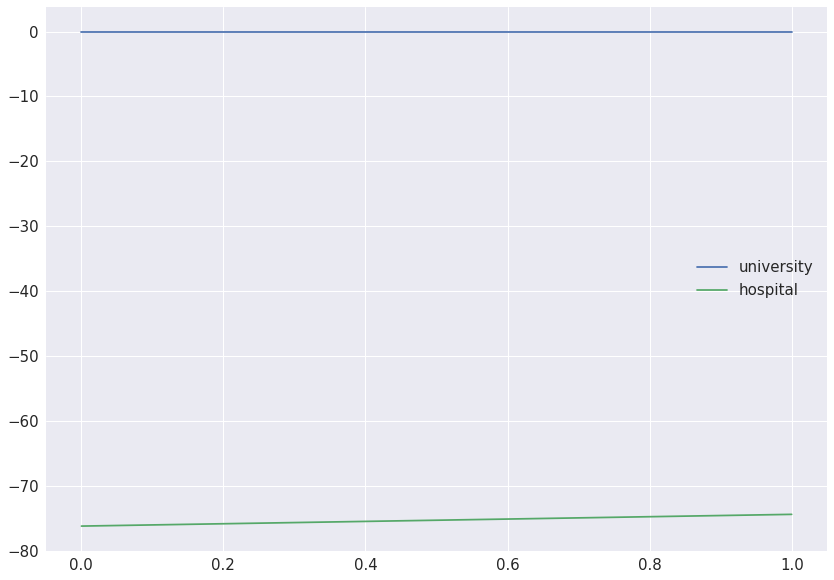

In [19]:
X = df[['university', 'hospital']]
y = df['earnings']

alphas = np.arange(0.001, 1, 0.002)
lasso_coefs = []
X_lasso= X[X.columns.tolist()] # Select columns / features for model

for a in alphas:
    lassoreg = Lasso(alpha=a, copy_X=True, normalize=True)
    lassoreg.fit(X_lasso, y)
    lasso_coefs.append(lassoreg.coef_)
    
lasso_coefs = np.asarray(lasso_coefs).T

plt.figure(figsize=(14,10))
for coefs, feature in zip(lasso_coefs, X_lasso.columns):
    plt.plot(alphas, coefs, label = feature)
plt.legend(loc='best')
plt.show()

El gráfico anterior muestra los coeficientes para las variables de universidad y hospital en 0 y aproximadamente -75, respectivamente. ¿Conservaría o eliminaría estas variables de su modelo? ¿Por qué?

<br>
<br>
<br>
<br>

# Data escalada

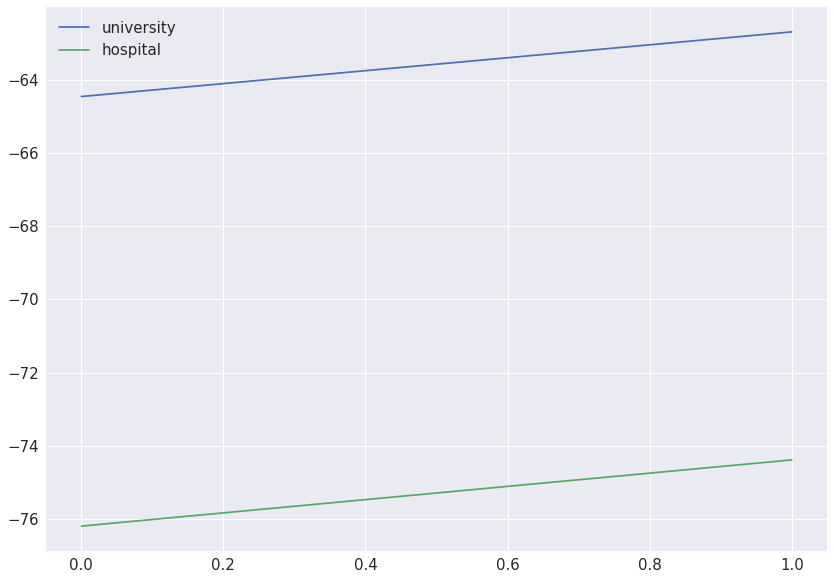

In [20]:
X = df_scaled[['university', 'hospital']]
y = df_scaled['earnings']

alphas = np.arange(0.001, 1, 0.002)
lasso_coefs = []
X_lasso= X[X.columns.tolist()] # Select columns / features for model

for a in alphas:
    lassoreg = Lasso(alpha=a, copy_X=True, normalize=True)
    lassoreg.fit(X_lasso, y)
    lasso_coefs.append(lassoreg.coef_)
    
lasso_coefs = np.asarray(lasso_coefs).T

plt.figure(figsize=(14,10))
for coefs, feature in zip(lasso_coefs, X_lasso.columns):
    plt.plot(alphas, coefs, label = feature)
plt.legend(loc='best')
plt.show()

El gráfico anterior muestra que el coeficiente para las variables de la universidad y el hospital es de alrededor de -64 y -76, respectivamente. ¿Conservaría o eliminaría estas variables de su modelo? ¿Por qué?

<br>
<br>
<br>
<br>

Claramente, la escala afecta los coeficientes y, por lo tanto, afecta los resultados de la regresión lasso. Por lo tanto, es mejor aplicar técnicas de regularización como ridge y lasso después de estandarizar los predictores. Puede estandarizar los predictores aplicando la siguiente fórmula:

$ \tilde{x}_{ij} = \frac{x_{ij}}{\sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_{ij} - \bar{x}_{j})^2}} $

Así que ahora tomemos los datos sin escala y creemos un nuevo conjunto de datos donde estandaricemos los predictores.

In [21]:
df_standardized = df.copy()

In [22]:
university_mean = df_standardized['university'].mean()
university_denom = sqrt(sum((df_standardized['university']-university_mean)**2)/len(df_standardized['university']))

hospital_mean = df_standardized['hospital'].mean()
hospital_denom = sqrt(sum((df_standardized['hospital']-hospital_mean)**2)/len(df_standardized['hospital']))

In [23]:
df_standardized['university'] = df_standardized['university']/university_denom
df_standardized['hospital'] = df_standardized['hospital']/hospital_denom


In [24]:
df_standardized

,earnings,hospital,university
0,1327.194514,5.926591,5.438299
1,1377.506720,5.486554,5.415918
2,1393.623554,5.449461,4.961448
3,1454.891832,4.913911,4.810340
4,1535.928334,4.773564,4.740642
5,1642.707292,4.759226,4.458132
6,1730.852965,4.725307,4.410067
7,1783.823380,4.530685,4.268558
8,1803.209197,4.420845,4.244551
9,1809.042949,4.360882,4.196147


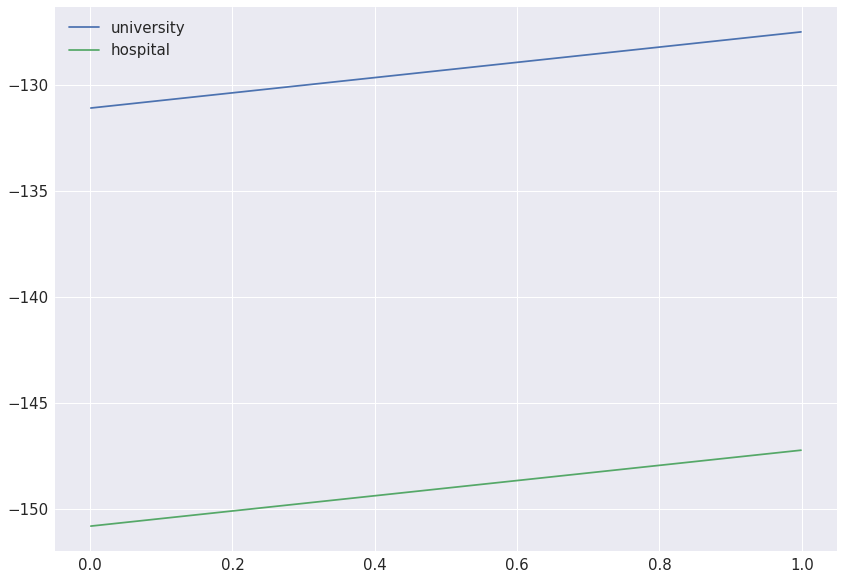

In [25]:
X = df_standardized[['university', 'hospital']]
y = df_standardized['earnings']

alphas = np.arange(0.001, 1, 0.002)
lasso_coefs = []
X_lasso= X[X.columns.tolist()] # Select columns / features for model

for a in alphas:
    lassoreg = Lasso(alpha=a, copy_X=True, normalize=True)
    lassoreg.fit(X_lasso, y)
    lasso_coefs.append(lassoreg.coef_)
    
lasso_coefs = np.asarray(lasso_coefs).T

plt.figure(figsize=(14,10))
for coefs, feature in zip(lasso_coefs, X_lasso.columns):
    plt.plot(alphas, coefs, label = feature)
plt.legend(loc='best')
plt.show()

Ahora que hemos escalado nuestras variables, ¡los coeficientes han vuelto a estar dentro del mismo orden de magnitud! 

Recuerde siempre estandarizar las variables cuando use la regularización.